In [1]:
import numpy as np
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


In [2]:
from feynmodel.interface.ufo import load_ufo_model
from feynmodel.interface.qgraf import feynmodel_to_qgraf
fm = load_ufo_model("ufo_sm")
qfm = feynmodel_to_qgraf(fm, True, False)

In [3]:
qgraf.install("3.6.5")
xml_string = qgraf.run("e_minus[p1], e_plus[p2]", "u[p3], u_bar[p4], g[p5]",
                       loops=0,
                       loop_momentum="l",
                       model = qfm, 
                       style=style,
                       debug=False)
#print(xml_string)

In [4]:
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.feynmandiagram import FeynML

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)
len(fml.diagrams)

4

In [5]:
fd1,fd2 = np.array(fml.diagrams)[[f.has_pdgid(22) for f in fml.diagrams]]
#fd1.legs = [fd1.legs[0],fd1.legs[1],fd1.legs[3],fd1.legs[2],fd1.legs[4]]
#fd2.legs = [fd2.legs[0],fd2.legs[1],fd2.legs[3],fd2.legs[2],fd2.legs[4]]

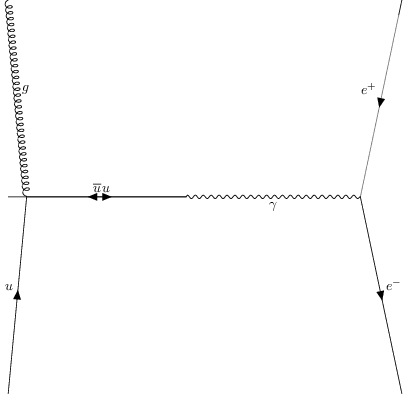

In [6]:
fd1.conjugated()

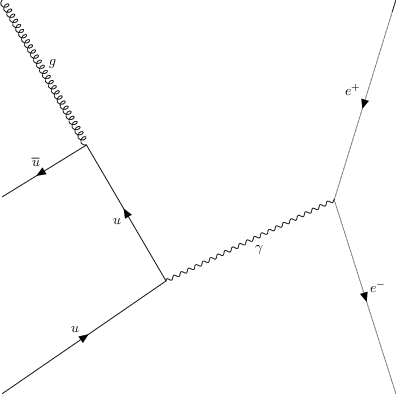

In [7]:
fd2.conjugated()

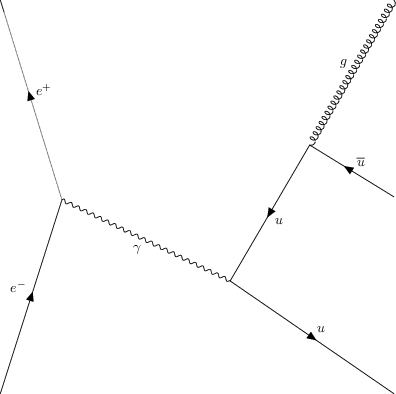

In [8]:
fd2

In [9]:
from feynamp import amplitude as amp
am = amp.add([fd1],fm)
am

'(-(ee*complex(0,1))*1*Gamma(MuInProp1,SpinIn2,SpinIn1) * complex(0,1)*G*T(GluOut3,ColOut1,ColInProp2)*Gamma(MuOut3,SpinOut1,SpinInProp2) * (2*ee*complex(0,1))/3.*Identity(ColOut2,ColOutProp2)*Gamma(MuOutProp1,SpinOutProp2,SpinOut2) * u(SpinIn1,Mom_p1) * v(SpinIn2,Mom_p2) * VC(ColOut1,Mom_p3)*u_bar(SpinOut1,Mom_p3) * VC(ColOut2,Mom_p4)*v_bar(SpinOut2,Mom_p4) * VA(GluOut3,Mom_p5)*eps_star(MuOut3,PolOut3,Mom_p5) * Metric(MuInProp1,MuOutProp1)*Denom(-Mom_p1-Mom_p2,0) * df(ColInProp2,ColOutProp2)*(P(Mu34,Mom_p3+Mom_p5)*Gamma(Mu34,SpinInProp2,SpinOutProp2) + 0*GammaId(SpinInProp2,SpinInProp2))*Denom(Mom_p3+Mom_p5,0))*1'

In [10]:
from feynamp import sympy as samp
samp.string_to_sympy(amp.feynman_diagram_to_string(fd1,fm))

0.666666666666667*I*G*ee**2*Denom(-Mom_p1 - Mom_p2, 0)*Denom(Mom_p3 + Mom_p5, 0)*Identity(ColOut2, ColOutProp2)*P(Mu41, Mom_p3 + Mom_p5)*T(GluOut3, ColOut1, ColInProp2)*VA(GluOut3, Mom_p5)*VC(ColOut1, Mom_p3)*VC(ColOut2, Mom_p4)*df(ColInProp2, ColOutProp2)*eps_star(MuOut3, PolOut3, Mom_p5)*gamma(Mu41, SpinInProp2, SpinOutProp2)*gamma(MuInProp1, SpinIn2, SpinIn1)*gamma(MuOut3, SpinOut1, SpinInProp2)*gamma(MuOutProp1, SpinOutProp2, SpinOut2)*metric(MuInProp1, MuOutProp1)*u(SpinIn1, Mom_p1)*u_bar(SpinOut1, Mom_p3)*v(SpinIn2, Mom_p2)*v_bar(SpinOut2, Mom_p4)

In [11]:
from feynamp.amplitude import square, multiply

s2 =square([fd1,fd2],fm,tag=False)
s2

'(-(ee*complex(0,1))*1*Gamma(MuInProp1,SpinIn2,SpinIn1) * complex(0,1)*G*T(GluOut3,ColOut1,ColInProp2)*Gamma(MuOut3,SpinOut1,SpinInProp2) * (2*ee*complex(0,1))/3.*Identity(ColOut2,ColOutProp2)*Gamma(MuOutProp1,SpinOutProp2,SpinOut2) * u(SpinIn1,Mom_p1) * v(SpinIn2,Mom_p2) * VC(ColOut1,Mom_p3)*u_bar(SpinOut1,Mom_p3) * VC(ColOut2,Mom_p4)*v_bar(SpinOut2,Mom_p4) * VA(GluOut3,Mom_p5)*eps_star(MuOut3,PolOut3,Mom_p5) * Metric(MuInProp1,MuOutProp1)*Denom(-Mom_p1-Mom_p2,0) * df(ColInProp2,ColOutProp2)*(P(Mu48,Mom_p3+Mom_p5)*Gamma(Mu48,SpinInProp2,SpinOutProp2) + 0*GammaId(SpinInProp2,SpinInProp2))*Denom(Mom_p3+Mom_p5,0))*(-(ee*complex(0,1))*1*Gamma(MuOutPropagator64,SpinLeg59,SpinLeg60) * complex(0,1)*G*T(GluLeg63,ColOutPropagator65,ColLeg61)*Gamma(MuLeg63,SpinOutPropagator65,SpinLeg61) * (2*ee*complex(0,1))/3.*Identity(ColInPropagator65,ColLeg62)*Gamma(MuInPropagator64,SpinLeg62,SpinInPropagator65) * u_bar(SpinLeg59,Mom_p1) * v_bar(SpinLeg60,Mom_p2) * VC(ColLeg61,Mom_p3)*u(SpinLeg61,Mom_p3) * 

In [12]:
amp.feynman_diagram_to_string(fd1.conjugated(),fm)

'-(ee*complex(0,1))*1*Gamma(MuOutPropagator98,SpinLeg93,SpinLeg94) * complex(0,1)*G*T(GluLeg97,ColOutPropagator99,ColLeg95)*Gamma(MuLeg97,SpinOutPropagator99,SpinLeg95) * (2*ee*complex(0,1))/3.*Identity(ColInPropagator99,ColLeg96)*Gamma(MuInPropagator98,SpinLeg96,SpinInPropagator99) * u_bar(SpinLeg93,Mom_p1) * v_bar(SpinLeg94,Mom_p2) * VC(ColLeg95,Mom_p3)*u(SpinLeg95,Mom_p3) * VC(ColLeg96,Mom_p4)*v(SpinLeg96,Mom_p4) * VA(GluLeg97,Mom_p5)*eps(MuLeg97,PolLeg97,Mom_p5) * Metric(MuInPropagator98,MuOutPropagator98)*Denom(-Mom_p1-Mom_p2,0) * df(ColInPropagator99,ColOutPropagator99)*(P(Mu106,Mom_p3+Mom_p5)*Gamma(Mu106,SpinInPropagator99,SpinOutPropagator99) + 0*GammaId(SpinInPropagator99,SpinInPropagator99))*Denom(Mom_p3+Mom_p5,0)'

In [13]:
from feynamp.form.color import *
from feynamp.form.lorentz import *
from feynamp.form.momentum import *
fs = ""
fs += get_gammas()
fs += get_color()
fs += get_kinematics()
fs += get_onshell(fd1,fm)
fs += get_mandelstamm_2_to_3(fd2,fm)
rs =apply(s2,fs)

In [14]:
rr =apply_den(rs, get_mandelstamm_2_to_3(fd1,fm) + get_onshell(fd1,fm))

In [15]:
rr

'-64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*mss35*mst15*mst24-64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*mss35*mst14*mst25+64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^2*mss35*mst25+64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^2*mss35*mst24+64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^2*mss35*mst15+64/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^2*mss35*mst14-128/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^4*mss35-128/9*1/(mss12)^2*1/(mss35)^2*G^2*Nc*Cf*ee^4*Mass_Me^4*mss35*mss45-64/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss45*mst14*mst23-64/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss45*mst13*mst24+128/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss45*mst13*mst23+128/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss35*mst14*mst24-64/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss35*mst14*mst23-64/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss35*mst13*mst24-64/9*1/(mss12)^2*1/(mss35)*1/(mss45)*G^2*Nc*Cf*ee^4*mss34*ms

In [24]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
ret =simplify(parse_expr(rr.replace("Mom_","").replace(".","_").replace("^","**")
                    .replace("Mass_Me","0")
                   .replace("mss","s")
                   .replace("msu","u")
                   .replace("mst","t")))
# here we use the tags to set the right relative sign
ret = simplify(ret.subs("Nc","3").subs("Cf","4/3")
               .subs("s34","-t13-t23-s35")
               .subs("t15","-s12-t13-t14")
               .subs("t25","-s21-t23-t24")
               .subs("fdDiagram3fdDiagram3","1").subs("fdDiagram6fdDiagram6","1").subs("fdDiagram3","1").subs("fdDiagram6","1").subs("fdDiagram3fdDiagram6","-1"))/2/2/3/3 # average spins and colors
ret

64*G**2*ee**4*(-s12*s35*t24 + s12*s45*t24 - s12*t13*t23 - s12*t13*t24 - s12*t23**2 - s12*t23*t24 - s21*s35*t14 + s21*s45*t14 - s21*t13**2 - s21*t13*t14 - s21*t13*t23 - s21*t14*t23 + 2*s45*t13*t23 + 2*s45*t14*t24 - 2*t13**2*t23 - 2*t13*t14*t24 - 2*t13*t23**2 - 2*t14*t23*t24)/(81*s12**2*s35*s45)

In [25]:
print(ret)

64*G**2*ee**4*(-s12*s35*t24 + s12*s45*t24 - s12*t13*t23 - s12*t13*t24 - s12*t23**2 - s12*t23*t24 - s21*s35*t14 + s21*s45*t14 - s21*t13**2 - s21*t13*t14 - s21*t13*t23 - s21*t14*t23 + 2*s45*t13*t23 + 2*s45*t14*t24 - 2*t13**2*t23 - 2*t13*t14*t24 - 2*t13*t23**2 - 2*t14*t23*t24)/(81*s12**2*s35*s45)


In [26]:
print(ret)

64*G**2*ee**4*(-s12*s35*t24 + s12*s45*t24 - s12*t13*t23 - s12*t13*t24 - s12*t23**2 - s12*t23*t24 - s21*s35*t14 + s21*s45*t14 - s21*t13**2 - s21*t13*t14 - s21*t13*t23 - s21*t14*t23 + 2*s45*t13*t23 + 2*s45*t14*t24 - 2*t13**2*t23 - 2*t13*t14*t24 - 2*t13*t23**2 - 2*t14*t23*t24)/(81*s12**2*s35*s45)
